In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web

In [8]:
# Aggregate Bonds ETF (BND) 10%
# Small Cap ETF (VB) 20%
# Developed markets ETF (VEA) 25%
# S&P 500 ETF (VOO) 25%
# Emerging Markets ETF (VWO) 20%
symbols = ['VOO','VEA', 'VB', 'VWO','BND']

In [14]:
price_data = web.get_data_yahoo(symbols,
                               start = '2016-01-01',
                               end = '2020-12-31')

In [15]:
print(price_data.head())

Attributes   Adj Close                                              \
Symbols            VOO        VEA         VB        VWO        BND   
Date                                                                 
2016-01-04  164.283875  30.214220  99.598427  27.064047  68.581848   
2016-01-05  164.578033  30.180799  99.653297  27.123663  68.666817   
2016-01-06  162.492264  29.629477  98.162270  26.638243  68.972694   
2016-01-07  158.534729  29.069796  95.518623  25.778120  68.981209   
2016-01-08  156.850082  28.710600  94.192238  25.548187  69.066170   

Attributes       Close                                               ...  \
Symbols            VOO        VEA          VB        VWO        BND  ...   
Date                                                                 ...   
2016-01-04  184.309998  36.169998  108.879997  31.780001  80.720001  ...   
2016-01-05  184.639999  36.130001  108.940002  31.850000  80.820000  ...   
2016-01-06  182.300003  35.470001  107.309998  31.280001  8

In [16]:
price_data = price_data['Adj Close']
print(price_data.head())

Symbols            VOO        VEA         VB        VWO        BND
Date                                                              
2016-01-04  164.283875  30.214220  99.598427  27.064047  68.581848
2016-01-05  164.578033  30.180799  99.653297  27.123663  68.666817
2016-01-06  162.492264  29.629477  98.162270  26.638243  68.972694
2016-01-07  158.534729  29.069796  95.518623  25.778120  68.981209
2016-01-08  156.850082  28.710600  94.192238  25.548187  69.066170


In [13]:
w = [0.1,0.2,0.25,0.25,0.2]

In [17]:
# calculate the asset returns in our portfolio
ret_data = price_data.pct_change()[1:]
print(ret_data.head())

Symbols          VOO       VEA        VB       VWO       BND
Date                                                        
2016-01-05  0.001791 -0.001106  0.000551  0.002203  0.001239
2016-01-06 -0.012673 -0.018267 -0.014962 -0.017897  0.004455
2016-01-07 -0.024355 -0.018889 -0.026931 -0.032289  0.000123
2016-01-08 -0.010626 -0.012356 -0.013886 -0.008920  0.001232
2016-01-11  0.000114  0.004364 -0.004856 -0.004334 -0.004183


In [18]:
#calculate the weighted returns of our assets
weighted_returns = (w * ret_data)
print(weighted_returns.head())

Symbols          VOO       VEA        VB       VWO       BND
Date                                                        
2016-01-05  0.000179 -0.000221  0.000138  0.000551  0.000248
2016-01-06 -0.001267 -0.003653 -0.003741 -0.004474  0.000891
2016-01-07 -0.002436 -0.003778 -0.006733 -0.008072  0.000025
2016-01-08 -0.001063 -0.002471 -0.003472 -0.002230  0.000246
2016-01-11  0.000011  0.000873 -0.001214 -0.001083 -0.000837


In [21]:
#the sum of the weighted returns of the assets
port_ret = weighted_returns.sum(axis=1)
# axis =1 tells pandas we want to add
# the rows
port_ret

Date
2016-01-05    0.000894
2016-01-06   -0.012245
2016-01-07   -0.020994
2016-01-08   -0.008989
2016-01-11   -0.002250
                ...   
2020-12-24   -0.000329
2020-12-28    0.001315
2020-12-29    0.001401
2020-12-30    0.006793
2020-12-31   -0.001349
Length: 1258, dtype: float64

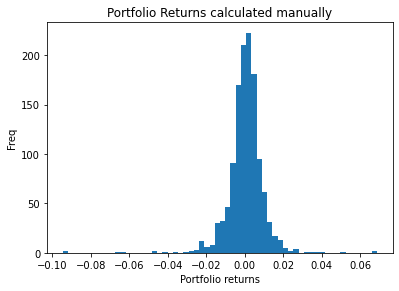

In [22]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.hist(port_ret, bins = 60)
ax1.set_xlabel('Portfolio returns')
ax1.set_ylabel("Freq")
ax1.set_title("Portfolio Returns calculated manually")
plt.show();